## 2.1 理解Python中的数据类型
要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。

In [1]:
import numpy as np

### 2.1.1 Python整型不仅仅是一个整型
标准的Python实现是用C语言编写的。这意味着每一个Python对象都是一个C语言结构体，该结构体不仅包含其值，还有其他信息。查看Python 3.4的源代码，可以发现长整型的定义，如下所示（C语言的宏经过扩展之后）：
```c
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

Python 3.4中的一个整型实际上包括4个部分:
+ ob_refcnt 是一个引用计数，它帮助 Python 默默地处理内存的分配和回收
+ ob_type 将变量的类型编码
+ ob_size 指定接下来的数据成员的大小
+ ob_digit 包含我们希望 Python 变量表示的实际整型值

### 2.1.2 Python列表不仅仅是一个列表
由于Python的动态类型特性，可以创建一个异构的列表：

In [2]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

这种灵活性要付出一定代价的：为了获得这些灵活的类型，列表中的每一项必须包含各自的类型信息、引用计数和其他信息；也就是说，每一项都是一个完整的Python对象。如果列表中的所有变量都是同一类型的，那么很多信息都会显得多余。动态类型的列表和固定类型的（NumPy式）数组间的区别如图所示：

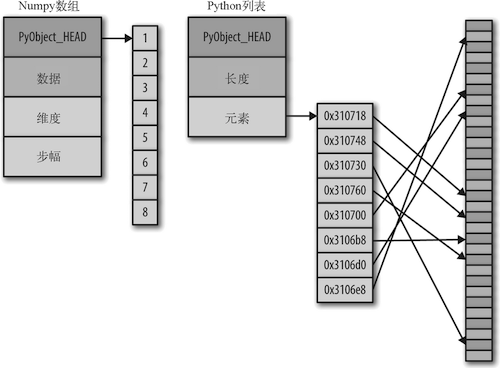

### 2.1.3 Python中的固定类型数组
Python提供了几种将数据存储在有效的、固定类型的数据缓存中的选项。内置的数组（array）模块（在Python 3.3之后可用）可以用于创建统一类型的密集数组：

In [3]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

这里的'i'是一个数据类型码，表示数据为整型。

更实用的是NumPy包中的ndarray对象。Python的数组对象提供了数组型数据的有效存储，而NumPy为该数据加上了高效的操作。

### 2.1.4 从Python列表创建数组
首先，可以用np.array从Python列表创建数组：

In [4]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

可以用dtype关键字指定ndarray类型：

In [5]:
np.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

NumPy数组可以被指定为多维的：

In [6]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### 2.1.5 从头创建数组
面对大型数组的时候，用NumPy内置的方法从头创建数组是一种更高效的方法：

In [7]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.ones((3, 5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [9]:
np.full((3, 5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [10]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# 创建一个5个元素的数组，这5个数均匀地分配到0~1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [12]:
# 创建一个3×3的、在0~1均匀分布的随机数组成的数组
np.random.random((3, 3))

array([[ 0.4761201 ,  0.95981809,  0.78371488],
       [ 0.92122263,  0.76186294,  0.51715907],
       [ 0.47223829,  0.25653942,  0.47610414]])

In [13]:
# 创建一个3×3的、均值为0、方差为1的
# 正态分布的随机数数组
np.random.normal(0, 1, (3, 3))

array([[-2.14485917, -0.23523435,  0.20289077],
       [-0.39536028,  1.5460471 , -0.58079139],
       [ 0.03182858,  0.85818262, -0.30981017]])

In [14]:
# 创建一个3×3的、[0, 10)区间的随机整型数组
np.random.randint(0, 10, (3, 3))

array([[8, 3, 1],
       [0, 5, 9],
       [4, 0, 5]])

In [15]:
# 创建一个3×3的单位矩阵
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [16]:
# 创建一个由3个整型数组成的未初始化的数组
# 数组的值是内存空间中的任意值
np.empty(3)

array([ 1.,  1.,  1.])

### 2.1.6 NumPy标准数据类型
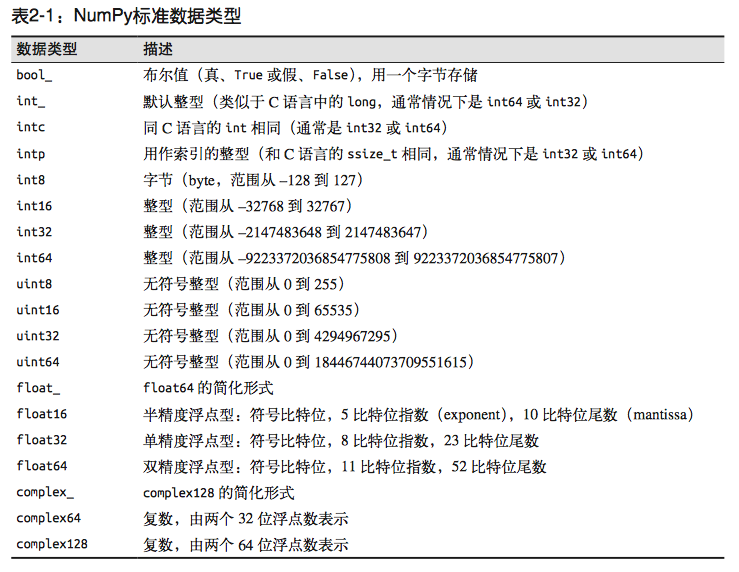



## 2.2 NumPy数组基础
我们将介绍以下几类基本的数组操作：
+ 数组的属性：确定数组的大小、形状、存储大小、数据类型
+ 数组的索引：获取和设置数组各个元素的值
+ 数组的切分：在大的数组中获取或设置更小的子数组
+ 数组的变形：改变给定数组的形状
+ 数组的拼接和分裂：将多个数组合并为一个，以及将一个数组分裂成多个

### 2.2.1 NumPy数组的属性
每个数组有nidm(数组的维度)、shape(数组每个维度的大小)、size(数组的总大小)属性、dtype(数组的数据类型)，其他的属性包括表示每个数组元素字节大小的itemsize，以及表示数组总字节大小的属性nbytes：

In [17]:
np.random.seed(0)  # 设置随机数种子
x3 = np.random.randint(10, size=(3, 4, 5))  # 三维数组
x3

array([[[5, 0, 3, 3, 7],
        [9, 3, 5, 2, 4],
        [7, 6, 8, 8, 1],
        [6, 7, 7, 8, 1]],

       [[5, 9, 8, 9, 4],
        [3, 0, 3, 5, 0],
        [2, 3, 8, 1, 3],
        [3, 3, 7, 0, 1]],

       [[9, 9, 0, 4, 7],
        [3, 2, 7, 2, 0],
        [0, 4, 5, 5, 6],
        [8, 4, 1, 4, 9]]])

In [18]:
x3.ndim, x3.shape, x3.size, x3.dtype

(3, (3, 4, 5), 60, dtype('int64'))

In [19]:
x3.itemsize, x3.nbytes

(8, 480)

### 2.2.3 数组切片：获取子数组
可以用切片（slice）符号获取子数组，切片符号用冒号（:）表示。为了获取数组 x 的一个切片，可以用以下方式：

```python
x[start:stop:step]
```

如果以上3个参数都未指定，那么它们会被分别设置默认值start=0、stop=<维度的大小>和 step=1。

多维切片也采用同样的方式处理，用冒号分隔。例如：

In [20]:
np.random.seed(0)  # 设置随机数种子
x2 = np.random.randint(10, size=(3, 4))  # 二维数组
x2

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [21]:
# 两行，三列
x2[:2, :3]

array([[5, 0, 3],
       [7, 9, 3]])

In [22]:
# 所有行，每隔一列
x2[:3, ::2]

array([[5, 3],
       [7, 3],
       [2, 7]])

In [23]:
# 子数组维度也可以同时被逆序
x2[::-1, ::-1]

array([[6, 7, 4, 2],
       [5, 3, 9, 7],
       [3, 3, 0, 5]])

**非副本视图的子数组**
关于数组切片有一点很重要也非常有用，那就是数组切片返回的是数组数据的视图，而不是数值数据的副本。这一点也是NumPy数组切片和Python列表切片的不同之处：在Python列表中，切片是值的副本。这种默认的处理方式实际上非常有用：它意味着在处理非常大的数据集时，可以获取或处理这些数据集的片段，而不用复制底层的数据缓存。

有些时候明确地复制数组里的数据或子数组也是非常有用的。可以很简单地通过copy()方法实现：

In [24]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[5, 0],
       [7, 9]])

In [25]:
x2_sub_copy[0, 0] = -42
x2

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### 2.2.4 数组的变形
数组变形最灵活的实现方式是通过reshape()函数来实现。*请注意，如果希望该方法可行，那么原始数组的大小必须和变形后数组的大小一致。如果满足这个条件，reshape方法将会用到原始数组的一个非副本视图*

In [26]:
grid = np.arange(1, 10).reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

另外一个常见的变形模式是将一个一维数组转变为二维的行或列的矩阵。可以通过reshape方法来实现，或者更简单地在一个切片操作中利用newaxis关键字：

In [27]:
x = np.arange(3)
x[np.newaxis, :]

array([[0, 1, 2]])

In [28]:
x[:, np.newaxis]

array([[0],
       [1],
       [2]])

### 2.2.5 数组拼接和分裂
本节主要关注将多个数组合并为一个、或将一个数组分裂成多个的操作。

#### 数组的拼接
拼接或连接NumPy中的两个数组主要由`np.concatenate`、`np.vstack`和`np.hstack`实现。

In [29]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

np.concatenate也可以用于二维数组的拼接：

In [30]:
grid = np.array([[1, 2, 3], [4, 5, 6]])

# 沿着第一个轴拼接
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [31]:
# 沿着第二个轴拼接（从0开始索引）
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

沿着固定维度处理数组时，使用np.vstack（垂直栈）和np.hstack（水平栈）函数会更简洁：

In [32]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])

# 垂直栈数组
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [33]:
# 水平栈数组
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

#### 数组的分裂
分裂可以通过`np.split`、`np.hsplit`和`np.vsplit`函数来实现。可以向以上函数传递一个索引列表作为参数，索引列表记录的是分裂点位置：

In [34]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
x1, x2, x3

(array([1, 2, 3]), array([99, 99]), array([3, 2, 1]))

N分裂点会得到N+1个子数组。相关的np.hsplit和np.vsplit的用法也类似：

In [35]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [36]:
upper, lower = np.vsplit(grid, [2])
upper

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [37]:
lower

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [38]:
left, right = np.hsplit(grid, [2])
left

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [39]:
right

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

## 2.3 NumPy数组的计算：通用函数
NumPy在Python数据科学世界中如此重要的原因，明确点说，NumPy提供了一个简单灵活的接口来优化数据数组的计算。

NumPy数组的计算有时非常快，有时也非常慢。使NumPy变快的关键是利用向量化操作，通常在NumPy的通用函数（ufunc）中实现。本节将介绍NumPy通用函数的重要性——它可以提高数组元素的重复计算的效率。

### 2.3.1 缓慢的循环
测试Python循环：

In [43]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output

big_array = np.random.randint(1, 100, size=1000000) 
%timeit compute_reciprocals(big_array)

3.22 s ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


完成百万次上述操作并存储结果花了几秒钟的时间！事实上，这里的处理瓶颈并不是运算本身，而是CPython在每次循环时必须做数据类型的检查和函数的调度。每次进行倒数运算时，Python首先检查对象的类型，并且动态查找可以使用该数据类型的正确函数。如果我们在编译代码时进行这样的操作，那么就能在代码执行之前知晓类型的声明，结果的计算也会更加有效率。

### 2.3.2 通用函数介绍
NumPy提供了方便的、静态类型的、可编译程序的接口，也被称作向量操作。你可以通过简单地对数组执行操作来实现，这里对数组的操作将会被用于数组中的每一个元素。这种向量方法被用于将循环推送至NumPy之下的编译层，这样会取得更快的执行效率。

In [44]:
%timeit (1.0/big_array)

2.49 ms ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 2.3.3 探索NumPy的通用函数
通用函数有两种：
1. 一元通用函数（unary ufunc）对单个输入操作
2. 二元通用函数 （binary ufunc）对两个输入操作

#### 2.3.3.1 数组的运算
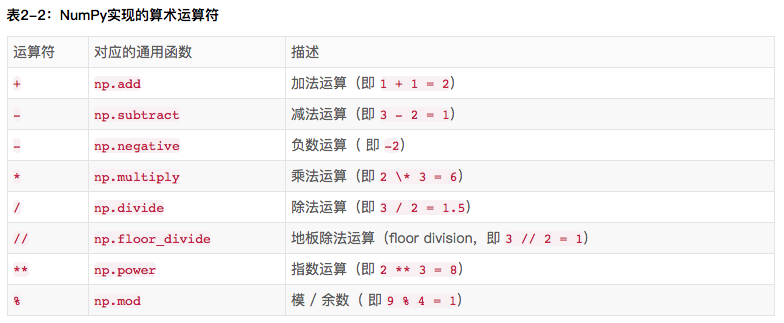

例如：

In [45]:
x = np.arange(4)
print("x =", x) 
print("x + 5 =", x + 5) 
print("x - 5 =", x - 5) 
print("x * 2 =", x * 2) 
print("x / 2 =", x / 2) 
print("x // 2 =", x // 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [ 0.   0.5  1.   1.5]
x // 2 = [0 0 1 1]


#### 2.3.3.2 绝对值
正如NumPy能理解Python内置的运算操作， NumPy也可以理解Python内置的绝对值函数：

In [48]:
# abs()等价于np.absolute()、np.abs()
x = np.array([-2, -1, 0, 1, 2]) 
abs(x), np.absolute(x)

(array([2, 1, 0, 1, 2]), array([2, 1, 0, 1, 2]))